## Homework #4. Exploratory Data Analysis
#### Author: `NIKITA ZAHORUI`
#### Total time spent on h/w (in minutes): 950

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import re

In [7]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
from sklearn import datasets

In [14]:
from nltk.tokenize import word_tokenize

In [16]:
from nltk.util import ngrams

In [19]:
import nltk

In [21]:
from nltk.corpus import stopwords

In [23]:
from langdetect import detect, DetectorFactory, lang_detect_exception, LangDetectException

In [25]:
from transformers import pipeline

In [26]:
import emoji

In [29]:
import string

In [31]:
from collections import Counter

In [33]:
import ast

In [35]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [37]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, dtype={'to_id': str})
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [321]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,306193,2024-04-16 11:01:25+00:00,PeerUser(user_id=857650813),347624504,NaN,дякую,text,NaN,347624504
1,306192,2024-04-16 11:01:16+00:00,PeerUser(user_id=857650813),347624504,NaN,ага,text,NaN,347624504
2,306191,2024-04-16 11:01:07+00:00,NaN,857650813,NaN,а формула то моя здогадка скоріше,text,NaN,347624504
3,306190,2024-04-16 11:00:56+00:00,NaN,857650813,NaN,медвідь казав шо автмоат на основі середнього ...,text,NaN,347624504
4,306189,2024-04-16 11:00:40+00:00,NaN,857650813,NaN,дякую сорі ахахаха,text,NaN,347624504
5,306188,2024-04-16 11:00:27+00:00,PeerUser(user_id=857650813),347624504,NaN,.,text,NaN,347624504
6,977,2019-12-02 07:31:41+00:00,NaN,857650813,NaN,NaN,text,NaN,882903709
7,363053,2024-09-02 02:41:30+00:00,PeerUser(user_id=482979767),PeerChat(chat_id=834002429),NaN,"І якщо не піти, то нічого не станеться, але це...",text,NaN,-834002429
8,363052,2024-09-02 02:40:56+00:00,PeerUser(user_id=654454255),PeerChat(chat_id=834002429),NaN,Потім спробуй відпрацювати ще,text,NaN,-834002429
9,363051,2024-09-02 02:40:52+00:00,PeerUser(user_id=482979767),PeerChat(chat_id=834002429),NaN,"Та нуу, у мене сьогодні перша пара",text,NaN,-834002429


In [322]:
df.shape

(620495, 9)

In [323]:
min(df["date"]),max(df["date"])

('2019-08-18 08:19:39+00:00', '2024-10-22 15:45:27+00:00')

In [324]:
df.groupby(["type"])["type"].count()

type
photo      119230
sticker      8568
text       472277
video       13311
voice        7109
Name: type, dtype: int64

In [325]:
df.groupby(["type"])["duration"].sum()

type
photo           0.000000
sticker         0.000000
text            0.000000
video      440387.329266
voice      194937.000000
Name: duration, dtype: float64

In [43]:
telegram_id = '857650813'

# Tasks

### 1. Calculate the longest sleep at night in 2024
### 2. Proportion of "funny" messages to all messages ('ahahaah' or similar messages)
### 2.1 Show "the funniest" chats (where the number of 'ahahaah' or similar messages is the biggest) <h3 style="color:green;">(Improved!)</h3>
### 2.2 Show the chats where I received the biggest amount of such messages <h3 style="color:green;">(Improved!)</h3>
### 2.3 Show the chats where I sent the biggest amount of such messages <h3 style="color:green;">(Improved!)</h3>
### 3. Show message activity throughout the week
### 4. Show average response time by hour
### 4.1 Show average response time by sentiment <h3 style="color:green;">(New!)</h3>
### 5. Display the most popular emojis in all messages
### 6. Show distribution of detected languages in messages
### 7. The distribution of sentiment analysis <h3 style="color:green;">(Improved!)</h3>
### 8. Show average message length by day of the week and hour <h3 style="color:green;">(Improved!)</h3>
### 9. Track from which device the user sends messages (if the user has a large number of messages written in capital letters, then most likely they are from a mobile phone) <h3 style="color:green;">(Improved!)</h3>
### 9.1 Show the distribution of messages starting with uppercase letter <h3 style="color:green;">(New!)</h3>
### 10. Determine the number of messages that end with a dot
### 11. Show average number of messages sent in a sequence to each user
### 12. Show the distribution of one-word messages to all 
### 13. Show average length of voice messages by hour of the day
### 14. Show top 10 bigrams
### 15. Show the frequency of @ and # tags in private chats and groups <h3 style="color:green;">(Improved!)</h3>
### 16. Show the most common channels from which messages are forwarded
### 17. Show messages that have questions 
### 18. Show the correlation between message length and word count for each message
### 19. Show messages distribution by weekend / weekday
### 20. Show the correlation between number count and special symbol count ($ or ₴ or %)
### 21. Show gender distribution in privat dialogs <h3 style="color:green;">(New!)</h3>
### 22. Show the distribution of swear words usage by gender <h3 style="color:green;">(New!)</h3>
### 23. Show the proportion of sentiment distribution by gender <h3 style="color:green;">(New!)</h3>
### 24. Show average message length by sentiment <h3 style="color:green;">(New!)</h3>
### 25. Show the sentiment distribution by hour of the day <h3 style="color:green;">(New!)</h3>

# Tasks

#### 1. Calculate the amount of sleep at night

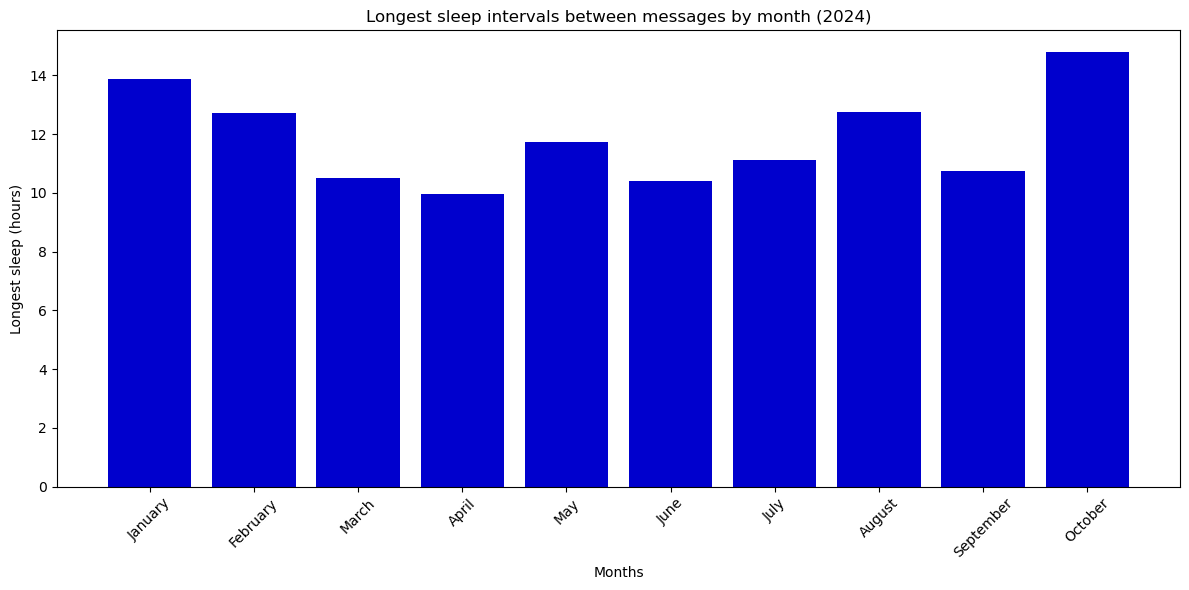

In [331]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

filtered_messages = df_copy[df_copy['from_id'] == telegram_id]

filtered_messages = filtered_messages[filtered_messages['date'].dt.year == 2024]

filtered_messages = filtered_messages.sort_values(by='date')

longest_intervals = []

start_date = filtered_messages['date'].min()

while start_date < filtered_messages['date'].max():
    end_date = start_date + pd.Timedelta(days=2)
    two_day_messages = filtered_messages[(filtered_messages['date'] >= start_date) & 
                                        (filtered_messages['date'] < end_date)]
    
    if len(two_day_messages) > 1:  
        time_diffs = two_day_messages['date'].diff()  
        if not time_diffs.empty:
            longest_interval = time_diffs.max()
            longest_intervals.append({'start_date': start_date, 'end_date': end_date, 'longest_interval': longest_interval})
    
    start_date += pd.Timedelta(days=2)

longest_intervals_df = pd.DataFrame(longest_intervals)

longest_intervals_df['longest_interval'] = longest_intervals_df['longest_interval'].dt.total_seconds() / 3600 
    
longest_intervals_df['month'] = longest_intervals_df['start_date'].dt.month_name()

plt.figure(figsize=(12, 6))
plt.bar(longest_intervals_df['month'], longest_intervals_df['longest_interval'], color='#0000CD')
        
plt.xlabel('Months')
plt.ylabel('Longest sleep (hours)')
plt.title('Longest sleep intervals between messages by month (2024)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Proportion of "funny" messages to all messages ('ahahaah' or similar messages)

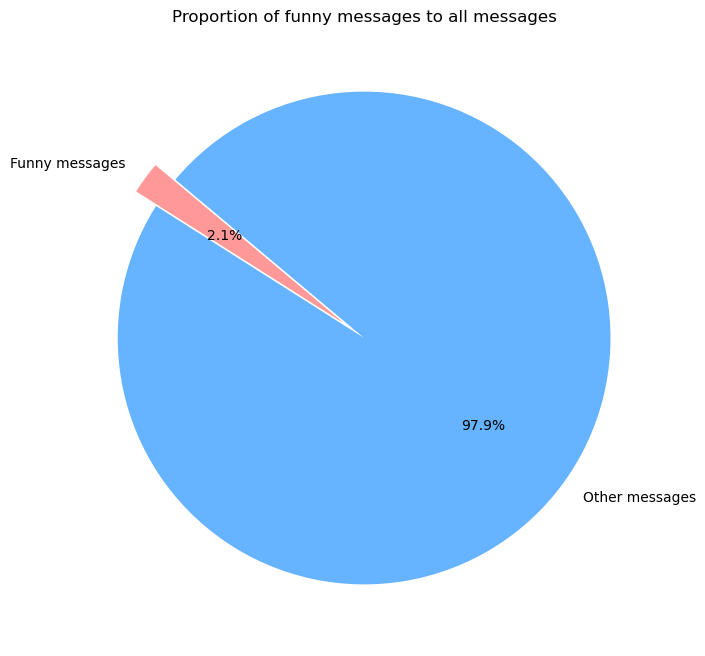

In [333]:
df_copy = df.copy()

total_messages_count = len(df_copy)

funny_messages = df_copy[df_copy['message'].str.match(r'^(?!([ахвпah])\1+$)[ахвпah]{2,}$', case=False, na=False)]

funny_messages_count = len(funny_messages)

labels = ['Funny messages', 'Other messages']
sizes = [
    (funny_messages_count / total_messages_count) * 100,  
    ((total_messages_count - funny_messages_count) / total_messages_count) * 100 
]
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'], explode=explode)
plt.title('Proportion of funny messages to all messages')
plt.show()

#### 2.1 Show "the funniest" chats (where the number of 'ahahaah' or similar messages is the biggest)

In [335]:
df_copy = df.copy()

funny_messages = df_copy[df_copy['message'].str.match(r'^(?!([ахвпah])\1+$)[ахвпah]{2,}$', case=False, na=False)]

funny_counts = funny_messages.groupby('dialog_id').size().reset_index(name='funny_count')

funniest_chats_with_names = funny_counts.merge(df_meta[['dialog_id', 'name']], on='dialog_id', how='left')

grouped_funniest_chats = funniest_chats_with_names.groupby('name', as_index=False).agg({'funny_count': 'sum'})

grouped_funniest_chats = grouped_funniest_chats.sort_values(by='funny_count', ascending=False).reset_index(drop=True)

grouped_funniest_chats.index += 1

grouped_funniest_chats['name'] = grouped_funniest_chats['name'].apply(
    lambda x: ''.join(c for c in x if isinstance(x, str) and not emoji.is_emoji(c)) if isinstance(x, str) else x
)

print(grouped_funniest_chats.head(10))

                         name  funny_count
1                          ФІ       753440
2                    ШПРОТИKN        47709
3   Legit Community Resellers         6912
4                        фі-2         6579
5                    без крыс         6504
6        После школы на завод         4784
7                        Валя         4023
8            Опитування (чат)         3200
9                  Не "Очев."         2700
10                     футбол         2696


#### 2.2 Show the chats where I received the biggest amount of such messages 

In [337]:
df_copy = df.copy()

if df_copy['to_id'].str.isdigit().any():
    numeric_to_id = df_copy[df_copy['to_id'].str.isdigit()]
else:
    df_copy['to_id'] = df_copy['to_id'].str.split('=').str[1]
    numeric_to_id = df_copy[df_copy['to_id'].str.isdigit()]

received_messages = numeric_to_id[numeric_to_id['to_id'] == str(telegram_id)]

funny_messages_received = received_messages[
    received_messages['message'].str.match(r'^(?!([ахвпah])\1+$)[ахвпah]{2,}$', case=False, na=False)
]

funny_counts_received = funny_messages_received.groupby('dialog_id').size().reset_index(name='funny_count')

funniest_chats_received = funny_counts_received.sort_values(by='funny_count', ascending=False).reset_index(drop=True)

funniest_chats_with_names = funniest_chats_received.merge(
    df_meta[['dialog_id', 'name']], on='dialog_id', how='left'
)

funniest_chats_with_names.index += 1

funniest_chats_with_names['name'] = funniest_chats_with_names['name'].apply(
    lambda x: ''.join(c for c in x if isinstance(x, str) and not emoji.is_emoji(c)) if isinstance(x, str) else x
)

print(funniest_chats_with_names[['name', 'funny_count']].head(10))

      name  funny_count
1     Валя         1720
2     Вова          477
3      NaN          356
4     Даня          309
5   Андрей          236
6     Женя          187
7   Рената          161
8     Поля          128
9      Аня           74
10   Чижик           63


#### 2.3 Show the chats where I sent the biggest amount of such messages

In [339]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

sent_messages = df_copy[df_copy['from_id'] == str(telegram_id)]

funny_messages_sent = sent_messages[sent_messages['message'].str.match(r'^(?!([ахвпah])\1+$)[ахвпah]{2,}$', case=False, na=False)]

funny_counts_sent = funny_messages_sent.groupby('dialog_id').size().reset_index(name='funny_count')

funniest_chats_sent = funny_counts_sent.sort_values(by='funny_count', ascending=False).reset_index(drop=True)

funniest_chats_sent.index += 1

funniest_chats_with_names_sent = funniest_chats_sent.merge(
    df_meta[['dialog_id', 'name']], on='dialog_id', how='left'
)

funniest_chats_with_names_sent['name'] = funniest_chats_with_names_sent['name'].apply(
    lambda x: ''.join(c for c in x if isinstance(x, str) and not emoji.is_emoji(c)) if isinstance(x, str) else x
)

print(funniest_chats_with_names_sent[['name', 'funny_count']].head(10))

             name  funny_count
0            Валя         2303
1            Поля          749
2             NaN          487
3            Вова          435
4          Андрей          363
5            Даня          260
6           Чижик          215
7            Женя          213
8  Ivan Vakulenko          103
9            Маша           98


#### 3. Show message activity throughout the week

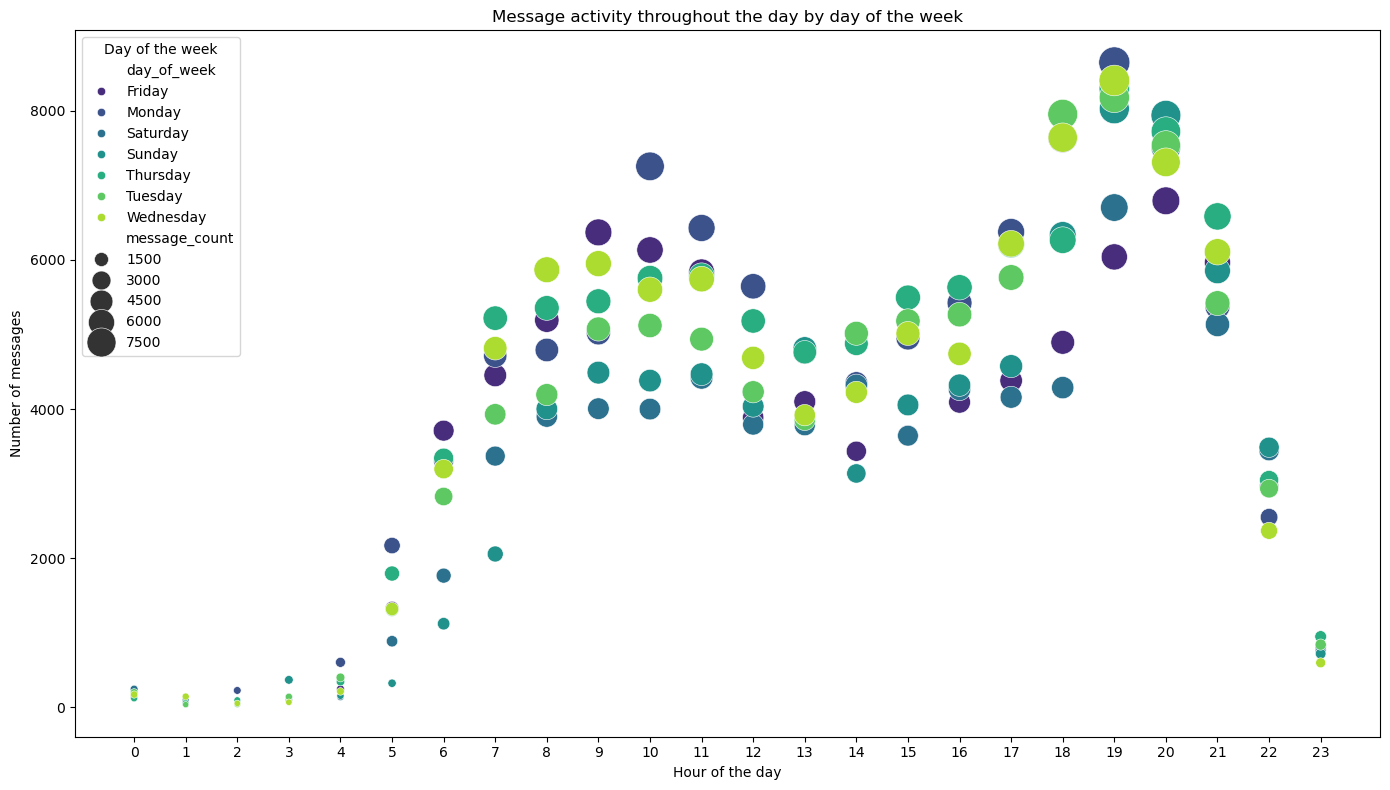

In [341]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['hour'] = df_copy['date'].dt.hour

df_copy['day_of_week'] = df_copy['date'].dt.day_name()

hourly_activity = df_copy.groupby(['hour', 'day_of_week']).size().reset_index(name='message_count')

plt.figure(figsize=(14, 8))

sns.scatterplot(x='hour', y='message_count', hue='day_of_week', size='message_count', sizes=(20, 500), data=hourly_activity, palette='viridis')

plt.xlabel('Hour of the day')
plt.ylabel('Number of messages')
plt.title('Message activity throughout the day by day of the week')
plt.xticks(range(24))
plt.legend(title='Day of the week')
plt.tight_layout()
plt.show()

#### 4. Show average response time by hour

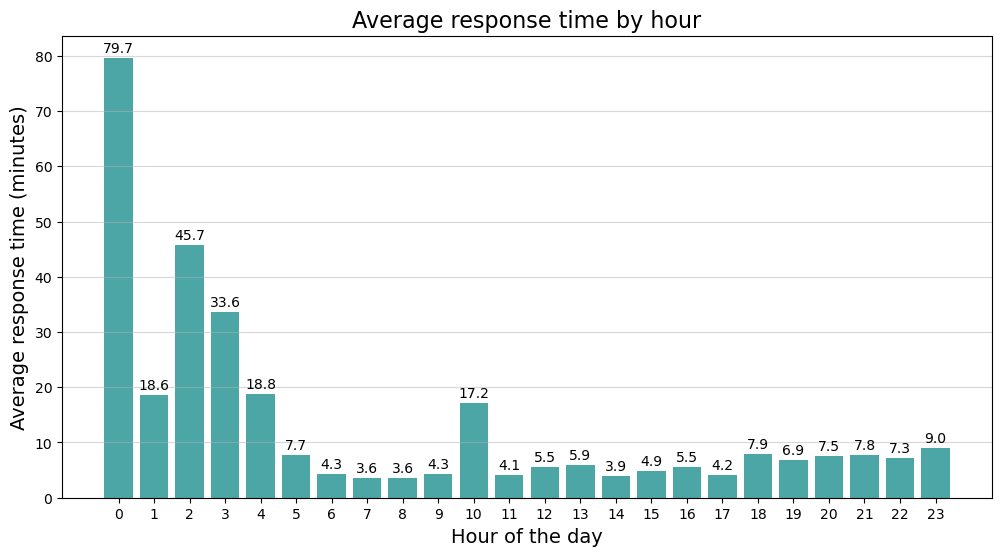

In [343]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy = df_copy.sort_values(by='date')

response_times = []

for i in range(len(df_copy) - 1):
    if df_copy['from_id'].iloc[i] == telegram_id and df_copy['from_id'].iloc[i + 1] != telegram_id:
        time_taken = (df_copy['date'].iloc[i + 1] - df_copy['date'].iloc[i]).total_seconds() / 60
        response_times.append((df_copy['date'].iloc[i].hour, time_taken))

response_df = pd.DataFrame(response_times, columns=['hour', 'response_time'])

average_response_time = response_df.groupby('hour')['response_time'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_response_time['hour'], average_response_time['response_time'], 
        color='teal', alpha=0.7)
plt.title('Average response time by hour', fontsize=16)
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Average response time (minutes)', fontsize=14)
plt.xticks(range(24))
plt.grid(axis='y', alpha= 0.5)
for i, value in enumerate(average_response_time['response_time']):
    plt.text(i, value + 1 , f'{value:.1f}', ha='center', fontsize=10)
plt.show()

#### 4.1 Show average response time by sentiment

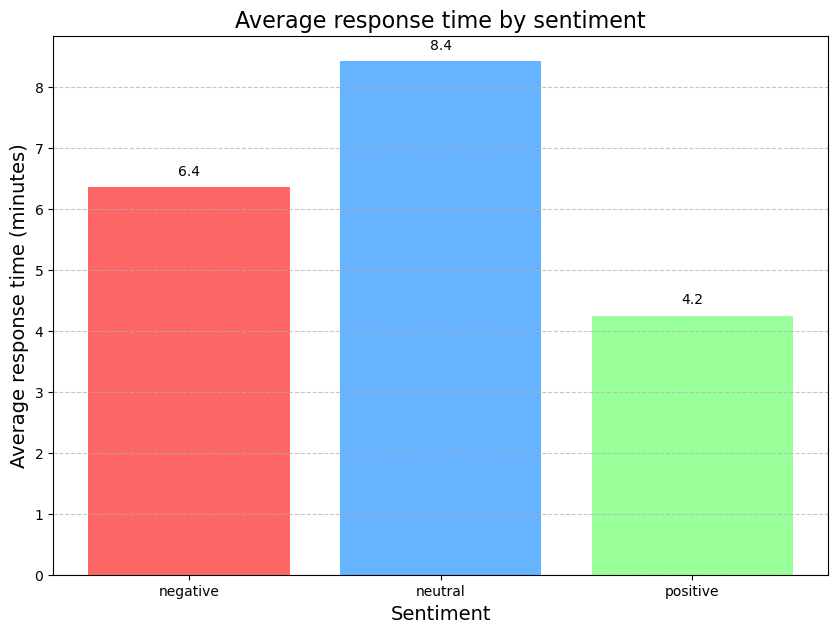

In [63]:
df_copy = df.copy()

df_copy = df_copy[df_copy['message'].notna() & (df_copy['message'].str.strip() != '')]

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

def load_tone_dict_ua(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=',')
    return dict(zip(tone_dict['word'], tone_dict['sentiment']))

def load_tone_dict_ru(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=';')
    return dict(zip(tone_dict['term'], tone_dict['value']))

def get_sentiment(message, tone_dict):
    words = message.split()
    sentiment_score = 0
    for word in words:
        word = word.lower()
        if word in tone_dict:
            sentiment_score += tone_dict[word]
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

tone_dict_ua = load_tone_dict_ua('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-uk-full.csv')

tone_dict_ru = load_tone_dict_ru('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-ru.csv')

df_copy['sentiment_ua'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ua))

df_copy['sentiment_ru'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ru))

df_copy['sentiment'] = df_copy['sentiment_ua'].combine_first(df_copy['sentiment_ru'])

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy = df_copy.sort_values(by='date')

response_times = []
for i in range(len(df_copy) - 1):
    if df_copy['from_id'].iloc[i] == telegram_id and df_copy['from_id'].iloc[i + 1] != telegram_id:
        time_taken = (df_copy['date'].iloc[i + 1] - df_copy['date'].iloc[i]).total_seconds() / 60
        response_times.append((df_copy['sentiment'].iloc[i], time_taken))

response_df = pd.DataFrame(response_times, columns=['sentiment', 'response_time'])

average_response_by_sentiment = response_df.groupby('sentiment')['response_time'].mean().reset_index()

plt.figure(figsize=(10, 7))
colors = {'positive': '#99ff99', 'neutral': '#66b3ff', 'negative': '#ff6666'}
plt.bar(
    average_response_by_sentiment['sentiment'],
    average_response_by_sentiment['response_time'],
    color=[colors[sent] for sent in average_response_by_sentiment['sentiment']]
)
plt.title('Average response time by sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Average response time (minutes)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(average_response_by_sentiment['response_time']):
    plt.text(i, value + 0.2, f'{value:.1f}', ha='center', fontsize=10)
plt.show()

#### 5. Display the most popular emojis in all messages

In [345]:
df_copy = df.copy()

def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

all_emojis = []

for message in df_copy['message'].fillna(''):
    emojis = extract_emojis(message)
    all_emojis.extend(emojis)

emoji_counts = Counter(all_emojis)

most_common_emojis = emoji_counts.most_common(10)

print("The most popular emojis in all messages:")
for emoji_char, count in most_common_emojis:
    print(f"{emoji_char}: {count}")

The most popular emojis in all messages:
😔: 3275
✅: 3144
😭: 3022
💋: 2501
🥺: 1144
🥰: 1112
🏻: 1103
❗: 1025
❤: 907
🙏: 835


#### 6. Show distribution of detected languages in messages

In [347]:
# df_copy = df.copy()

# DetectorFactory.seed = 0

# df_copy['message'] = df_copy['message'].fillna('')

# messages = df_copy[df_copy['message'].str.strip() != '']['message']

# detected_languages = []

# for message in messages:
#     try:
#         language = detect(message)
#         detected_languages.append(language)
#     except LangDetectException:
#         detected_languages.append('unknown')

# languages_df = pd.DataFrame({
#     'message': messages,
#     'detected_language': detected_languages
# })

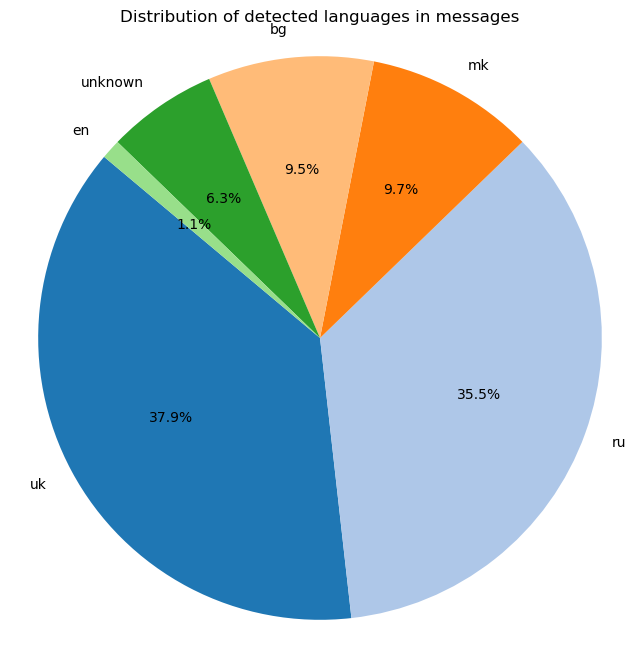

In [348]:
languages_df = pd.read_csv('detected_languages.csv')

language_counts = languages_df['detected_language'].value_counts()

threshold = 0.01 * len(languages_df)

other_count = language_counts[language_counts < threshold].sum()

language_counts = language_counts[language_counts >= threshold]

language_counts['unknown'] += other_count

plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of detected languages in messages')
plt.axis('equal')
plt.show()

# unfortunately, langdetect does not work well with Slavic languages, so after analyzing bg and mk, it is mostly uk and ru
# "unknown" are messages that could not be identified or was identified very poorly

#### 7. The distribution of sentiment analysis (Improved!)

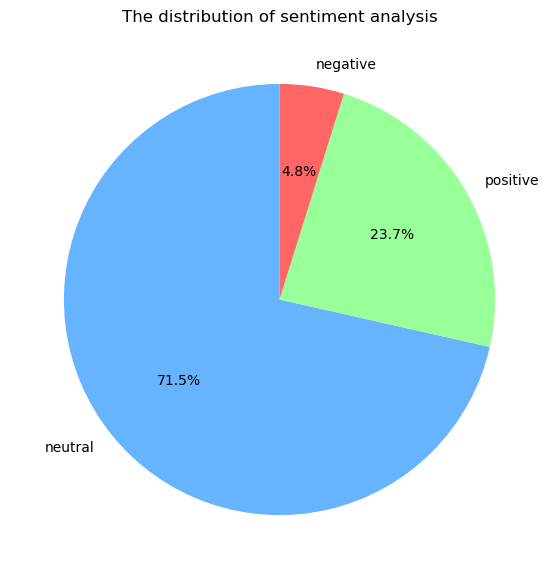

In [350]:
df_copy = df.copy()

def load_tone_dict_ua(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=',')
    return dict(zip(tone_dict['word'], tone_dict['sentiment']))

def load_tone_dict_ru(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=';')
    return dict(zip(tone_dict['term'], tone_dict['value']))

def get_sentiment(message, tone_dict):
    words = message.split()
    sentiment_score = 0
    for word in words:
        word = word.lower()
        if word in tone_dict:
            sentiment_score += tone_dict[word]
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

tone_dict_ua = load_tone_dict_ua('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-uk-full.csv')

tone_dict_ru = load_tone_dict_ru('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-ru.csv')

df_copy = df_copy[df_copy['message'].notna() & (df_copy['message'].str.strip() != '')]

df_copy['sentiment_ua'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ua))

df_copy['sentiment_ru'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ru))

df_copy['sentiment'] = df_copy['sentiment_ua'].combine_first(df_copy['sentiment_ru'])

sentiment_counts = df_copy['sentiment'].value_counts()

plt.figure(figsize=(7, 7))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('The distribution of sentiment analysis')
plt.ylabel('')
plt.show()

#### 8. Show average message length by day of the week and hour

/var/folders/sx/r3ltm00s6_77ygm7hw9d566c0000gn/T/ipykernel_73454/2172935371.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_length = df_copy.groupby(['day_of_week', 'hour'])['message_length'].mean().reset_index()


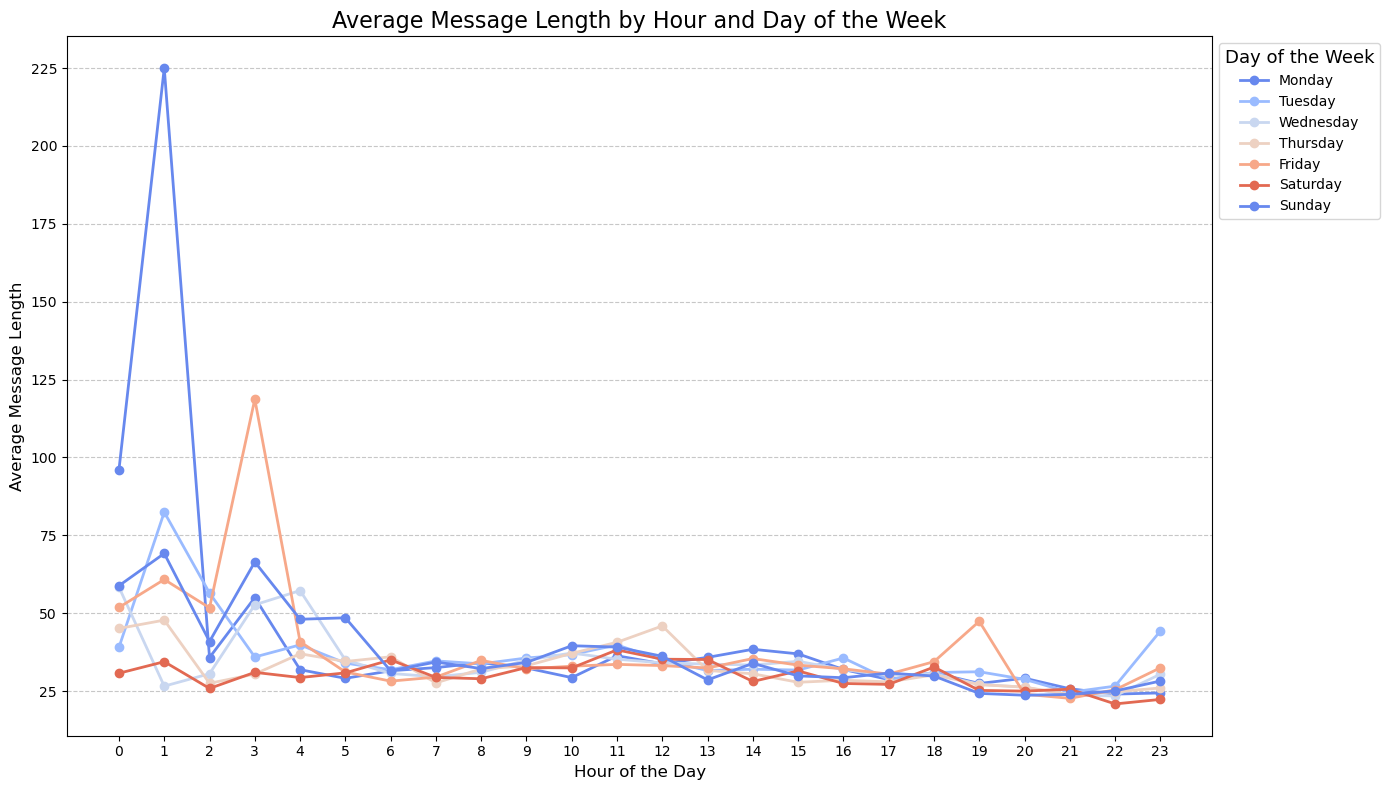

In [190]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['hour'] = df_copy['date'].dt.hour

df_copy['day_of_week'] = df_copy['date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_copy['day_of_week'] = pd.Categorical(df_copy['day_of_week'], categories=day_order, ordered=True)

df_copy['message_length'] = df_copy['message'].str.len()

average_length = df_copy.groupby(['day_of_week', 'hour'])['message_length'].mean().reset_index()

pivot_table = average_length.pivot(index='hour', columns='day_of_week', values='message_length')

sns.set_palette("coolwarm")

plt.figure(figsize=(14, 8))

for day in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[day], marker='o', label=day, linewidth=2)

plt.title('Average Message Length by Hour and Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Message Length', fontsize=12)
plt.xticks(range(24), rotation=0)
plt.legend(title='Day of the Week', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# I think that the length of the messages at the first hours of the day is related to the fact that most of these messages are birthday greetings, etc.
# (Changes!) put the days of the week in order, changed diagram and the colors to more neutral ones

#### 9. Track from which device the user sends messages (if the user has a large number of messages written in capital letters, then most likely they are from a mobile phone)

In [354]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

def extract_user_info(users_str):
    try:
        users_dict = ast.literal_eval(users_str)
        user_id = users_dict.get('user_id', None)
        first_name = users_dict.get('first_name', '')
        last_name = users_dict.get('last_name', '')
        first_name = first_name.strip() if isinstance(first_name, str) else ''
        last_name = last_name.strip() if isinstance(last_name, str) else ''
        return user_id, first_name, last_name
    except (ValueError, SyntaxError):
        return None, None, None

filtered_meta_copy = df_meta.copy()

filtered_meta_copy[['user_id', 'first_name', 'last_name']] = filtered_meta_copy['users'].apply(lambda x: pd.Series(extract_user_info(x)))

df_copy['first_letter_upper'] = df_copy['message'].str[0].str.isupper()

user_message_count = df_copy.groupby('from_id').size().reset_index(name='total_messages')

user_uppercase_count = df_copy.groupby('from_id')['first_letter_upper'].sum().reset_index(name='uppercase_messages')

user_message_stats = pd.merge(user_message_count, user_uppercase_count, on='from_id')

user_message_stats['uppercase_percentage'] = (user_message_stats['uppercase_messages'] / user_message_stats['total_messages']) * 100

top_10_users = user_message_stats[user_message_stats['uppercase_percentage'] < 100].sort_values(by='uppercase_percentage', ascending=False).head(10)

top_10_users.reset_index(drop=True, inplace=True)

top_10_users.index += 1

top_10_users['from_id'] = top_10_users['from_id'].astype(int)

top_10_users_with_names = top_10_users.copy()

top_10_users_with_names['name'] = top_10_users_with_names['from_id'].map(
    filtered_meta_copy.set_index('user_id').apply(
        lambda row: row['first_name'] if row['first_name'] else row['last_name'], axis=1).to_dict()
)

print(top_10_users_with_names[['name', 'uppercase_percentage']])

# I removed people whose percentage is 100, because there are channels in which the requirements for each message are very strict
# There are some NaN values ​​because their ids are missing from df_meta

                              name uppercase_percentage
1   Legit Community Chat Admin Bot            99.452555
2                              NaN                 96.0
3                             Леся            95.652174
4                              NaN            95.652174
5                              NaN            95.238095
6                           Bogdan            94.736842
7                              NaN            94.382022
8                             Даня            93.939394
9                                𝐕            93.333333
10                         Ярослав            92.857143


#### 9.1 Show the distribution of messages starting with uppercase letter

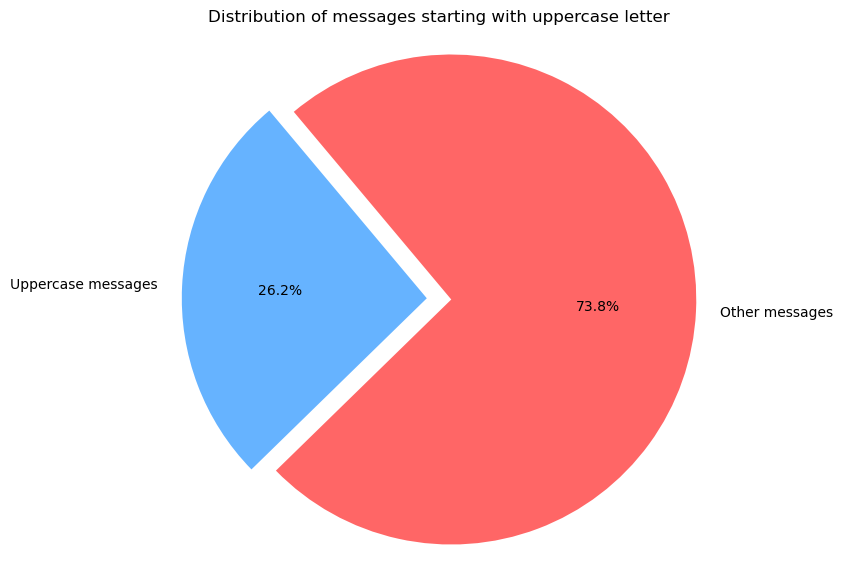

In [356]:
df_copy = df.copy()

df_copy['first_letter_upper'] = df_copy['message'].str[0].str.isupper()

total_messages = len(df_copy)
uppercase_messages = df_copy['first_letter_upper'].sum()

labels = ['Uppercase messages', 'Other messages']
sizes = [uppercase_messages, total_messages - uppercase_messages]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)  # "explode" the first slice (Uppercase messages)
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=130, explode=explode)
plt.title('Distribution of messages starting with uppercase letter')
plt.axis('equal')
plt.show()

#### 10. Determine the number of messages that end with a dot

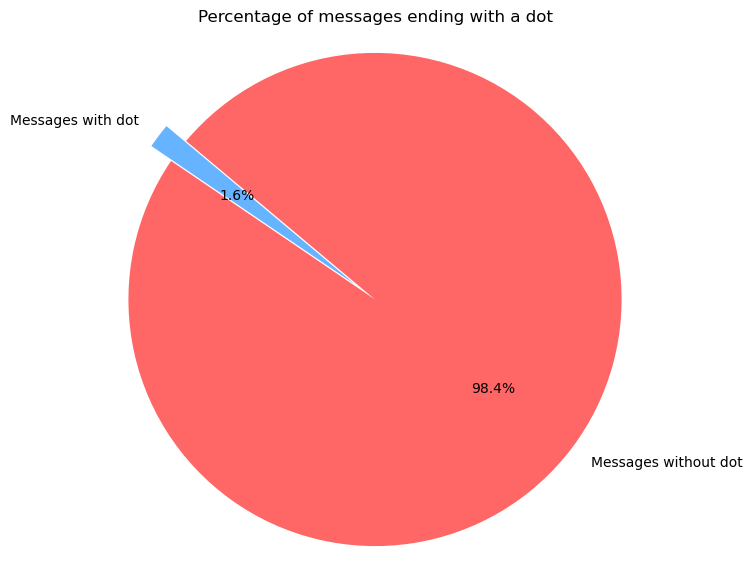

In [358]:
df_copy = df.copy()

df_copy['ends_with_dot'] = df_copy['message'].str.endswith('.')

total_messages = len(df_copy)
messages_with_dot = df_copy['ends_with_dot'].sum()

labels = ['Messages with dot', 'Messages without dot']
sizes = [messages_with_dot, total_messages - messages_with_dot]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Percentage of messages ending with a dot')
plt.axis('equal')
plt.show()

#### 11. Show average number of messages sent in a sequence to each user

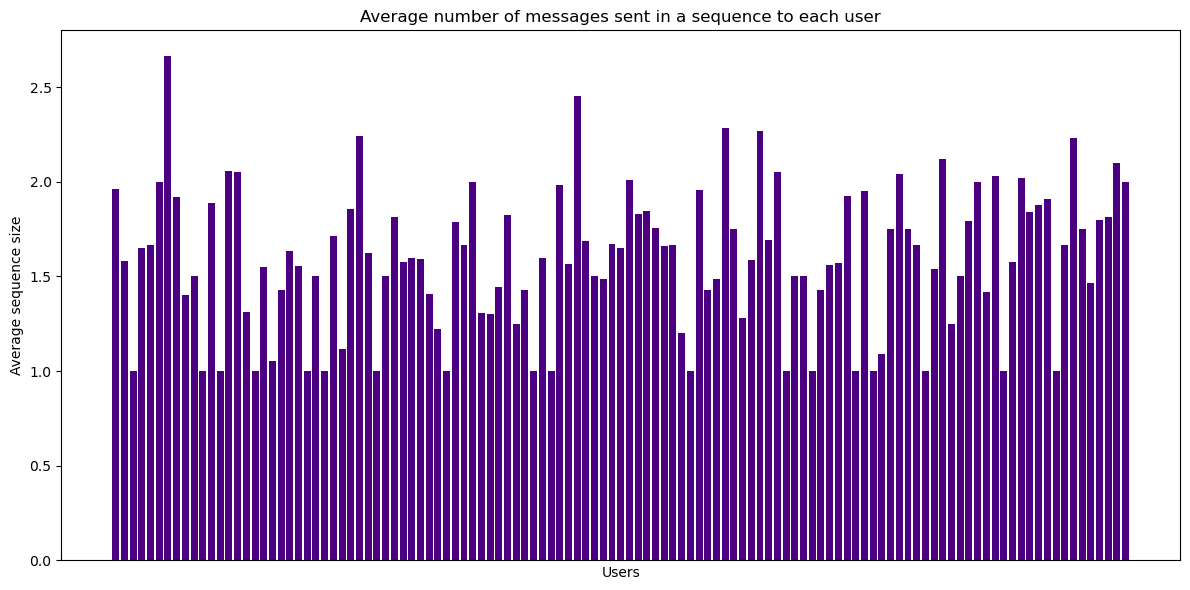

In [360]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

if df_copy['to_id'].str.isdigit().any():
    df_copy = df_copy[df_copy['to_id'].str.isdigit()]
else:
    df_copy['to_id'] = df_copy['to_id'].str.split('=').str[1]
    df_copy = df_copy[df_copy['to_id'].str.isdigit()]

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy = df_copy.sort_values('date')

df_copy = df_copy[df_copy['type'] == 'text']

df_copy['sequence'] = (df_copy['from_id'] != df_copy['from_id'].shift()).cumsum()

sequence_counts = df_copy.groupby(['sequence', 'to_id']).size().reset_index(name='message_count')

average_message_sequence = sequence_counts.groupby('to_id')['message_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_message_sequence['to_id'].astype(str), average_message_sequence['message_count'], color='indigo')
plt.xlabel('Users')
plt.ylabel('Average sequence size')
plt.title('Average number of messages sent in a sequence to each user')
plt.xticks([])
plt.tight_layout()
plt.show()

#### 12. Show the distribution of one-word messages to all 

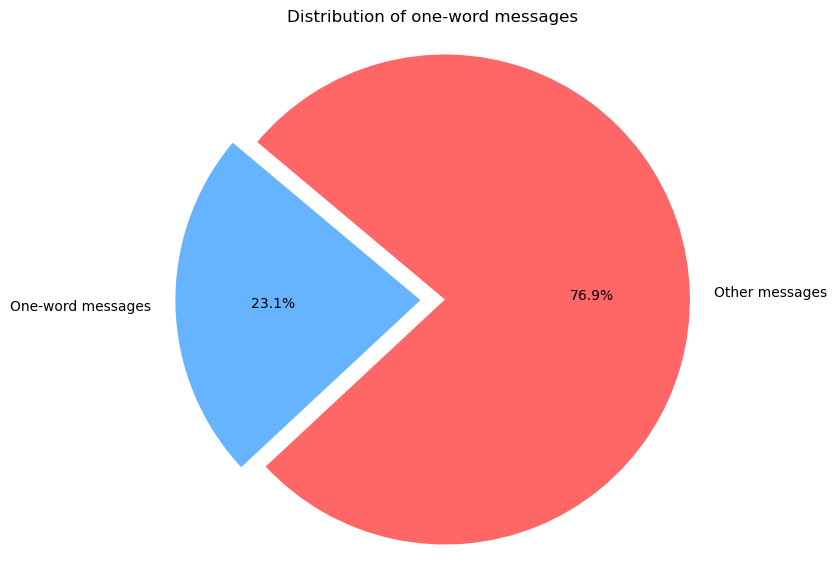

In [362]:
df_copy = df.copy()

df_copy['word_count'] = df_copy['message'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

one_word_messages = df_copy[df_copy['word_count'] == 1]

one_word_share = len(one_word_messages) / len(df_copy)

labels = ['One-word messages', 'Other messages']
sizes = [one_word_share, 1 - one_word_share]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of one-word messages')
plt.axis('equal')
plt.show()

#### 13. Show average length of voice messages by hour of the day

/var/folders/sx/r3ltm00s6_77ygm7hw9d566c0000gn/T/ipykernel_71298/921667433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_messages['hour'] = voice_messages['date'].dt.hour


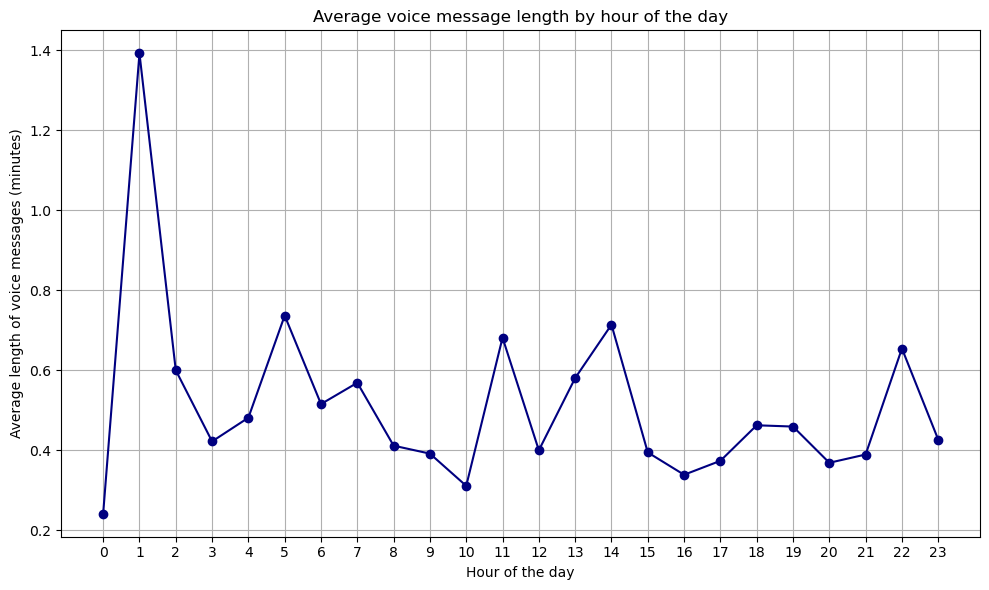

In [364]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

voice_messages = df_copy[df_copy['type'] == 'voice']

voice_messages['hour'] = voice_messages['date'].dt.hour

avg_voice_length_per_min = voice_messages.groupby('hour')['duration'].mean() / 60

plt.figure(figsize=(10, 6))
plt.plot(avg_voice_length_per_min.index, avg_voice_length_per_min.values, marker='o', color='navy')
plt.title('Average voice message length by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Average length of voice messages (minutes)')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### 14. Show top 10 bigrams

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


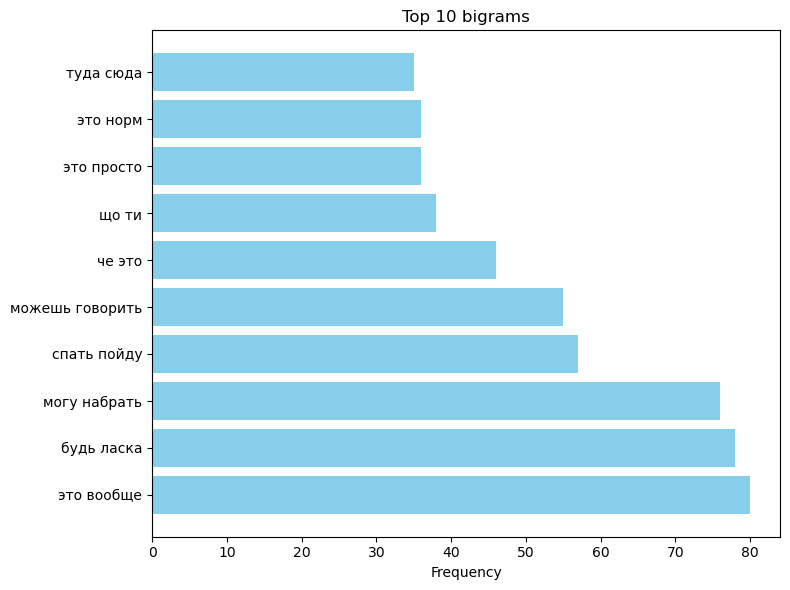

In [366]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

nltk.download('stopwords')

stop_words = stopwords.words('russian')

with open('stopwords.txt', 'r', encoding='utf-8') as f:
    custom_stop_words = [line.strip() for line in f.readlines()]

def filter_stopwords(text):
    return [word for word in text.split() if word not in custom_stop_words and word not in stop_words]

df_copy['message'] = df_copy['message'].fillna('').str.lower().apply(lambda x: re.sub(r'[^a-zа-яіїєґ\s]', '', x))

df_filtered = df_copy[df_copy['from_id'] == telegram_id]

bigrams = Counter()

for message in df_filtered['message']:
    words = filter_stopwords(message)
    bigrams.update(ngrams(words, 2))

bigrams_sorted = bigrams.most_common(10)

bigram_labels, bigram_counts = zip(*[(' '.join(bigram), count) for bigram, count in bigrams_sorted])

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.barh(bigram_labels, bigram_counts, color='skyblue')
ax1.set_title("Top 10 bigrams")
ax1.set_xlabel("Frequency")
plt.tight_layout()
plt.show()

#### 15. Show the frequency of @ and # tags in private chats and groups

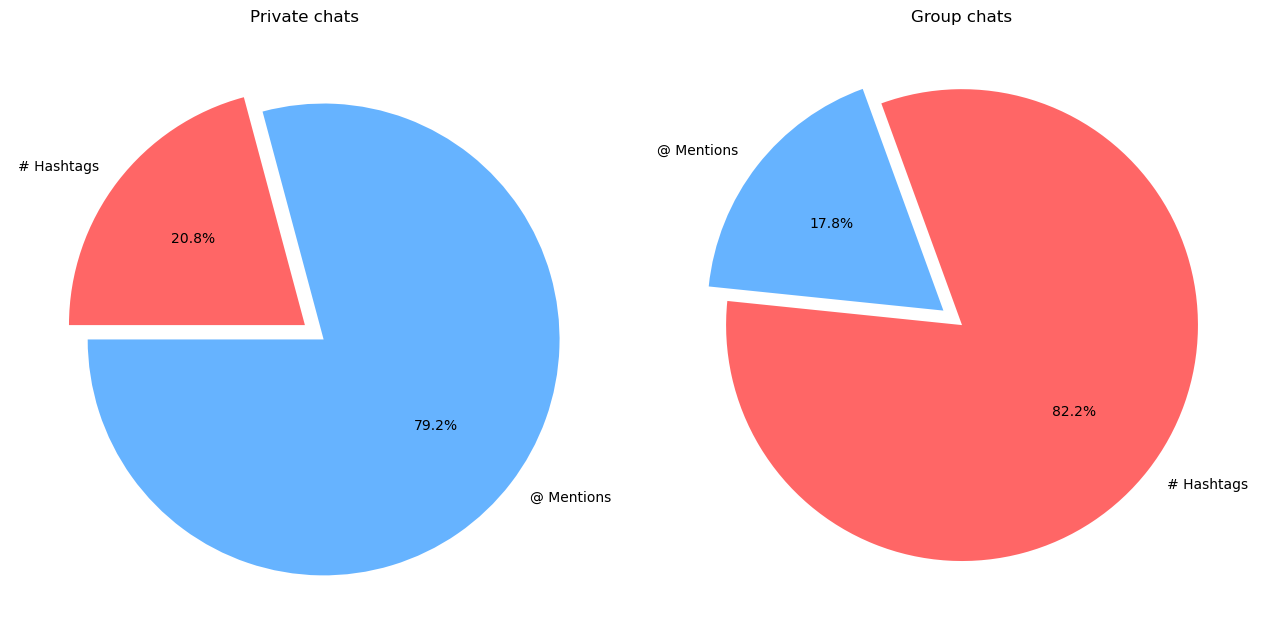

In [104]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]

def contains_tag(message, tag_type):
    if isinstance(message, str):
        if tag_type == 'mention':
            return bool(re.search(r'@\w+', message))
        elif tag_type == 'hashtag':
            return bool(re.search(r'#\w+', message))
    return False

df_private = df_copy[df_copy['from_id'] == telegram_id]

df_group = df_copy[df_copy['from_id'] != telegram_id]

def count_tags(df, tag_type):
    return df['message'].apply(lambda x: contains_tag(x, tag_type)).sum()

private_mentions = count_tags(df_private, 'mention')

private_hashtags = count_tags(df_private, 'hashtag')

group_mentions = count_tags(df_group, 'mention')

group_hashtags = count_tags(df_group, 'hashtag')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))
explode = (0.1, 0)

private_sizes = [private_mentions, private_hashtags]
private_labels = ['@ Mentions', '# Hashtags']
private_colors = ['#66b3ff', '#ff6666']
ax[0].pie(private_sizes, labels=private_labels, colors=private_colors, autopct='%1.1f%%', startangle=180, explode=explode)
ax[0].set_title('Private сhats')

group_sizes = [group_mentions, group_hashtags]
group_labels = ['@ Mentions', '# Hashtags']
group_colors = ['#66b3ff', '#ff6666']
ax[1].pie(group_sizes, labels=group_labels, colors=group_colors, autopct='%1.1f%%', startangle = 110, explode=explode)
ax[1].set_title('Group сhats')

plt.tight_layout()
plt.show()

#### 16. Show the most common channels from which messages are forwarded

In [177]:
df_copy = df.copy()

df_copy = df_copy.dropna(subset=['fwd_from'])

df_copy['fwd_from'] = df_copy['fwd_from'].apply(lambda x: int(re.search(r'channel_id=(-?\d+)', str(x)).group(1)) if re.search(r'channel_id=(-?\d+)', str(x)) else None)

df_filtered = df_copy.dropna(subset=['fwd_from'])

channel_counts = Counter(df_filtered['fwd_from'])

most_common_channels = channel_counts.most_common(10)

for channel, count in most_common_channels:
    print(f"Channel ID: {int(channel)}, Message count: {count}")

Channel ID: 2030509372, Message count: 788
Channel ID: 1320475121, Message count: 639
Channel ID: 1920735257, Message count: 338
Channel ID: 1578031860, Message count: 336
Channel ID: 2000911650, Message count: 240
Channel ID: 1181183917, Message count: 207
Channel ID: 1233777422, Message count: 130
Channel ID: 1258173254, Message count: 99
Channel ID: 1206439755, Message count: 69
Channel ID: 1409920010, Message count: 68


#### 17. Show messages that have questions 

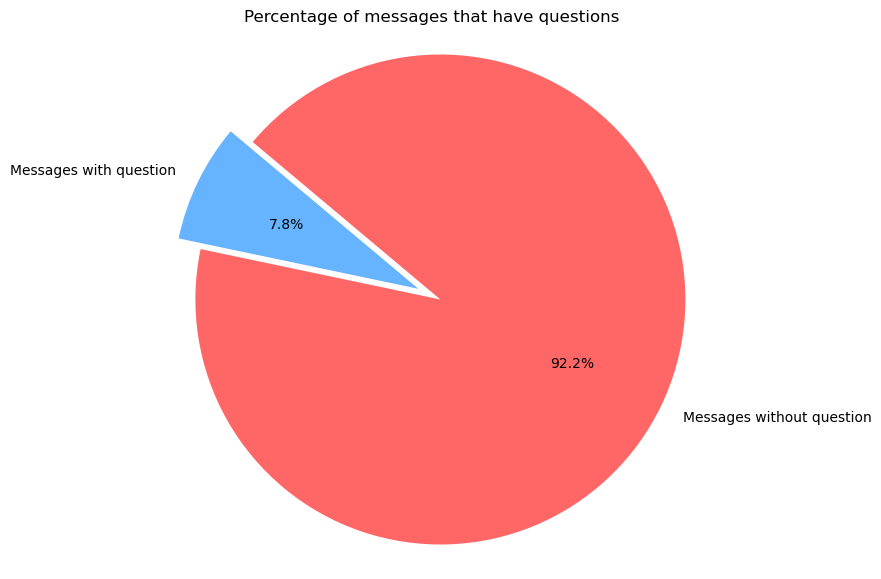

In [372]:
df_copy = df.copy()

messages_with_question = df[df['message'].apply(lambda x: isinstance(x, str) and '?' in x)]

count_messages_with_question = len(messages_with_question)

total_messages = len(df_copy)

labels = ['Messages with question', 'Messages without question']
sizes = [count_messages_with_question, total_messages - count_messages_with_question]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Percentage of messages that have questions')
plt.axis('equal')
plt.show()

#### 18. Show the correlation between message length and word count for each message

Correlation coefficient: 0.8662614467714683


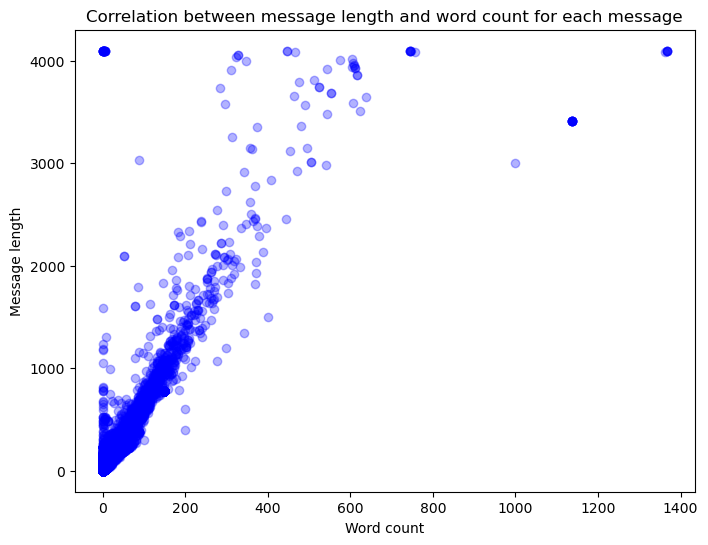

In [374]:
df_copy = df.copy()

df_copy = df_copy[df_copy['message'].notna()]

df_copy['message_length'] = df_copy['message'].str.len()

df_copy['word_count'] = df_copy['message'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

correlation = df_copy['message_length'].corr(df_copy['word_count'])

print(f'Correlation coefficient: {correlation}')

plt.figure(figsize=(8, 6))
plt.scatter(df_copy['word_count'], df_copy['message_length'], alpha=0.3, color='blue')
plt.title('Correlation between message length and word count for each message')
plt.xlabel('Word count')
plt.ylabel('Message length')
plt.show()

#### 19. Show messages distribution by weekend / weekday

Messages in weekend: 153725
Messages in weekdays: 466770


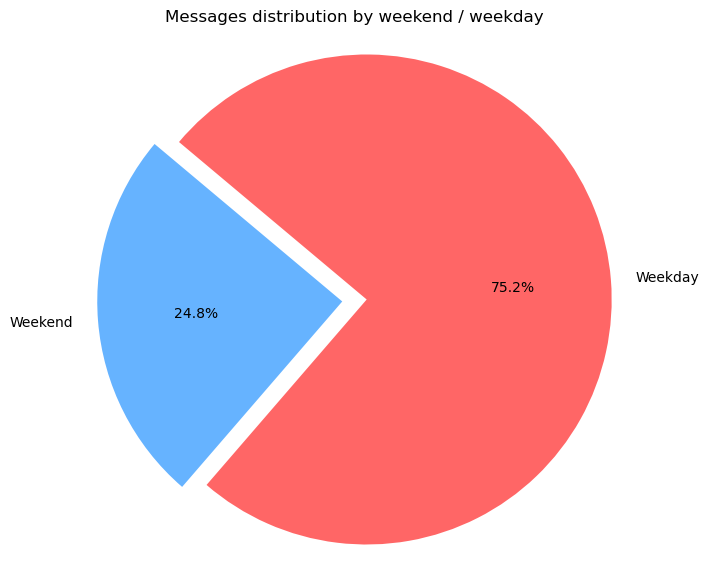

In [376]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['day_of_week'] = df_copy['date'].dt.dayofweek

df_copy['is_weekend'] = df_copy['day_of_week'].isin([5, 6])

messages_count = df_copy['is_weekend'].value_counts()

weekend_count = messages_count.get(True, 0)
weekday_count = messages_count.get(False, 0)

print(f'Messages in weekend: {weekend_count}')
print(f'Messages in weekdays: {weekday_count}')

labels = ['Weekend', 'Weekday']
sizes = [weekend_count, weekday_count]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Messages distribution by weekend / weekday')
plt.axis('equal')
plt.show()

#### 20. Show the correlation between number count and special symbol count ($ or ₴ or %)

Correlation between number count and special symbol ($ or %) count: 0.28144969353743765


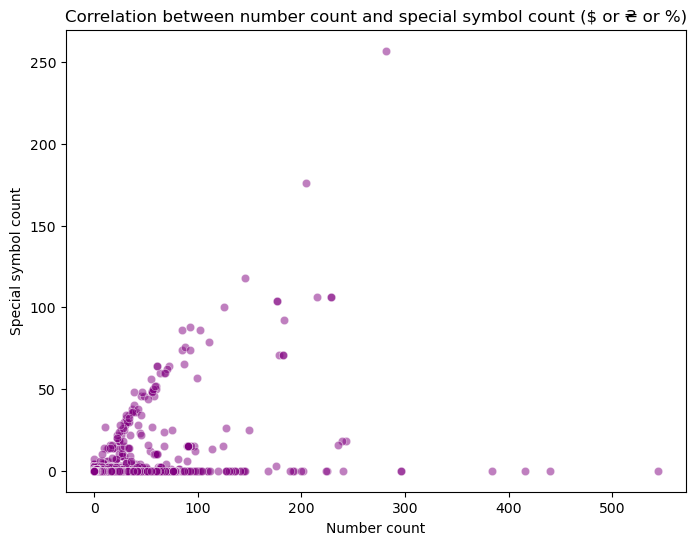

In [130]:
df_copy = df.copy()

df_copy['number_count'] = df_copy['message'].apply(lambda x: sum(char.isdigit() for char in x) if isinstance(x, str) else 0)

df_copy['special_symbol_count'] = df_copy['message'].apply(lambda x: sum(char in ['$', '%', '₴'] for char in x) if isinstance(x, str) else 0)

correlation = df_copy['number_count'].corr(df_copy['special_symbol_count'])

print(f'Correlation between number count and special symbol ($ or %) count: {correlation}')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='number_count', y='special_symbol_count', alpha=0.5, color='purple')
plt.title('Сorrelation between number count and special symbol count ($ or ₴ or %)')
plt.xlabel('Number сount')
plt.ylabel('Special symbol count')
plt.show()

#### 21. Show gender distribution in privat dialogs

/var/folders/sx/r3ltm00s6_77ygm7hw9d566c0000gn/T/ipykernel_71298/3057298650.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_meta_copy.loc[:, 'full_name'] = filtered_meta_copy['users'].apply(extract_user_names)
/var/folders/sx/r3ltm00s6_77ygm7hw9d566c0000gn/T/ipykernel_71298/3057298650.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_meta_copy['gender'] = filtered_meta_copy['full_name'].apply(determine_gender)


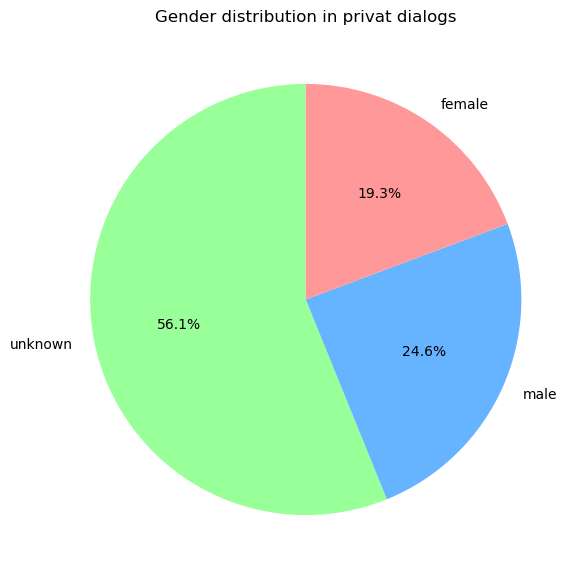

In [380]:
df_meta_copy = df_meta.copy()

filtered_meta_copy = df_meta_copy[df_meta_copy['type'] == 'Private dialog']

female_files = ['/Users/nikita/tone-dict-ukrainian/dicts/female_ru_ukr_trans_names.csv', '/Users/nikita/tone-dict-ukrainian/dicts/female_russian_names.csv', '/Users/nikita/tone-dict-ukrainian/dicts/female_ukrainian_names.csv']

male_files = ['/Users/nikita/tone-dict-ukrainian/dicts/male_ru_ukr_trans_names.csv', '/Users/nikita/tone-dict-ukrainian/dicts/male_russian_names.csv', '/Users/nikita/tone-dict-ukrainian/dicts/male_ukrainian_names.csv']

female_names = pd.concat([pd.read_csv(file) for file in female_files], ignore_index=True)

male_names = pd.concat([pd.read_csv(file) for file in male_files], ignore_index=True)

female_name_set = set(female_names['name'].str.lower())

male_name_set = set(male_names['name'].str.lower())

def extract_user_names(users_str):
    try:
        users_dict = ast.literal_eval(users_str)
        first_name = users_dict.get('first_name', '')
        last_name = users_dict.get('last_name', '')
        first_name = first_name.strip() if isinstance(first_name, str) else ''
        last_name = last_name.strip() if isinstance(last_name, str) else ''
        if first_name and last_name:
            return f"{first_name} {last_name}"
        elif first_name:
            return first_name
        elif last_name:
            return last_name
    except (ValueError, SyntaxError):
        return None
    return None

filtered_meta_copy.loc[:, 'full_name'] = filtered_meta_copy['users'].apply(extract_user_names)

filtered_meta_copy.reset_index(drop=True, inplace=True)

def determine_gender(full_name):
    first_name = full_name.split()[0].strip().lower()
    if first_name in female_name_set:
        return 'female'
    elif first_name in male_name_set:
        return 'male'
    else:
        return 'unknown'

filtered_meta_copy['gender'] = filtered_meta_copy['full_name'].apply(determine_gender)

gender_counts = filtered_meta_copy['gender'].value_counts()

plt.figure(figsize=(7, 7))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#99FF99','#66B3FF','#FF9999'])
plt.title('Gender distribution in privat dialogs')
plt.ylabel('')
plt.show()

# many users hide their names, that's why there are so many unknowns

#### 22. Show the distribution of swear words usage by gender

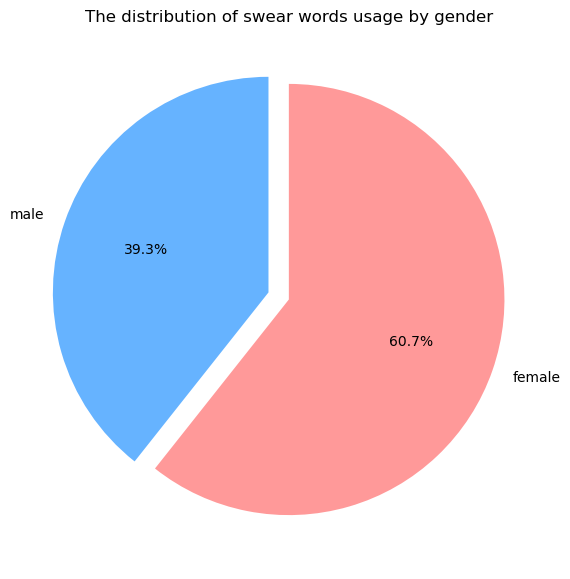

In [382]:
df_copy = df.copy()

df_copy = df_copy[df_copy['message'].notna() & (df_copy['message'].str.strip() != '')]

def load_swear_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        swear_words = file.read().splitlines()
    return set(swear_words)

df_copy['from_id'] = df_copy['from_id'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if isinstance(x, str) else x)

swear_words = load_swear_words('swear_words.txt')

male_ids = set(filtered_meta_copy[filtered_meta_copy['gender'] == 'male']['dialog_id'])

female_ids = set(filtered_meta_copy[filtered_meta_copy['gender'] == 'female']['dialog_id'])

male_messages = []

female_messages = []

for index, row in df_copy.iterrows():
    user_id = row['from_id']
    message = row['message']
    
    gender = None
    if user_id in male_ids:
        gender = 'male'
    elif user_id in female_ids:
        gender = 'female'

    if gender == 'male':  
        male_messages.append({'from_id': user_id, 'message': message, 'contains_swear_words': any(swear_word in message.lower() for swear_word in swear_words), 'gender': gender})
    elif gender == 'female':  
        female_messages.append({'from_id': user_id, 'message': message, 'contains_swear_words': any(swear_word in message.lower() for swear_word in swear_words), 'gender': gender})

male_messages = pd.DataFrame(male_messages)

female_messages = pd.DataFrame(female_messages)

male_proportion = male_messages['contains_swear_words'].sum() / len(male_messages)

female_proportion = female_messages['contains_swear_words'].sum() / len(female_messages)

proportions = pd.Series({'male': male_proportion, 'female': female_proportion})

proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66B3FF', '#FF9999'], figsize=(7, 7), explode=(0.1, 0))
plt.title('The distribution of swear words usage by gender')
plt.ylabel('')
plt.show()

#### 23. Show the proportion of sentiment distribution by gender

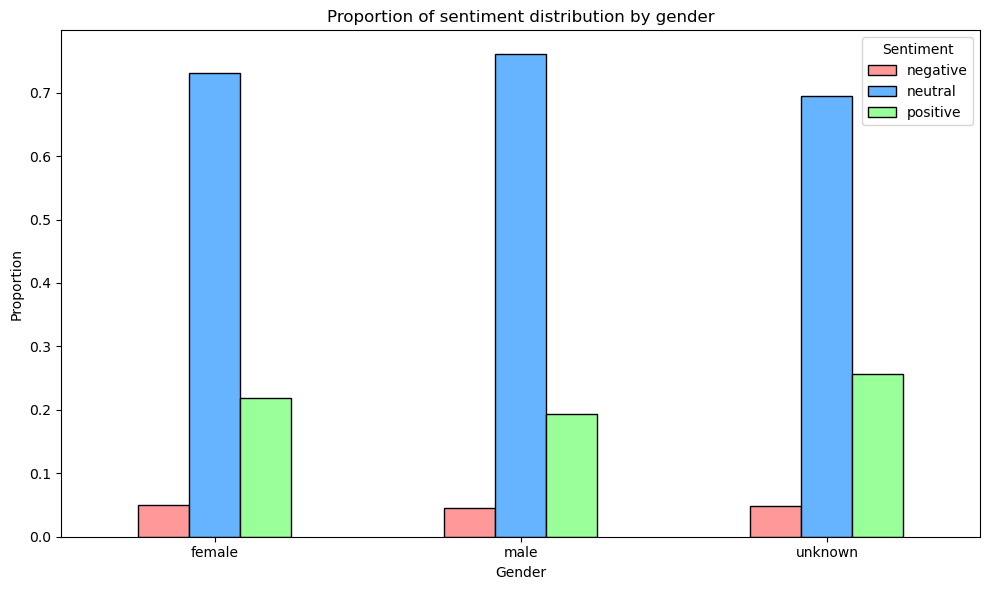

In [384]:
df_copy = df.copy()

df_copy = df_copy[df_copy['message'].notna() & (df_copy['message'].str.strip() != '')]

def load_tone_dict_ua(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=',')
    return dict(zip(tone_dict['word'], tone_dict['sentiment']))

def load_tone_dict_ru(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=';')
    return dict(zip(tone_dict['term'], tone_dict['value']))

def get_sentiment(message, tone_dict):
    words = message.split()
    sentiment_score = sum(tone_dict.get(word.lower(), 0) for word in words)
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

tone_dict_ua = load_tone_dict_ua('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-uk-full.csv')

tone_dict_ru = load_tone_dict_ru('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-ru.csv')

df_copy['from_id'] = df_copy['from_id'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if isinstance(x, str) else x)

male_ids = set(filtered_meta_copy[filtered_meta_copy['gender'] == 'male']['dialog_id'])

female_ids = set(filtered_meta_copy[filtered_meta_copy['gender'] == 'female']['dialog_id'])

df_copy['gender'] = df_copy['from_id'].apply(
    lambda x: 'male' if x in male_ids else 'female' if x in female_ids else 'unknown'
)

df_copy['sentiment_ua'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ua))

df_copy['sentiment_ru'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ru))

df_copy['sentiment'] = df_copy['sentiment_ua'].combine_first(df_copy['sentiment_ru'])

gender_sentiment_counts = df_copy.groupby(['gender', 'sentiment']).size().unstack(fill_value=0)

gender_sentiment_proportions = gender_sentiment_counts.div(gender_sentiment_counts.sum(axis=1), axis=0)

gender_sentiment_proportions.plot(
    kind='bar',
    figsize=(10, 6),
    color=['#ff9999', '#66b3ff', '#99ff99'],
    edgecolor='black'
)

plt.title('Proportion of sentiment distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

#### 24. Show average message length by sentiment

/var/folders/sx/r3ltm00s6_77ygm7hw9d566c0000gn/T/ipykernel_71298/231110768.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='average_length', data=sentiment_stats, palette=['#66b3ff', '#99ff99', '#ff6666'])


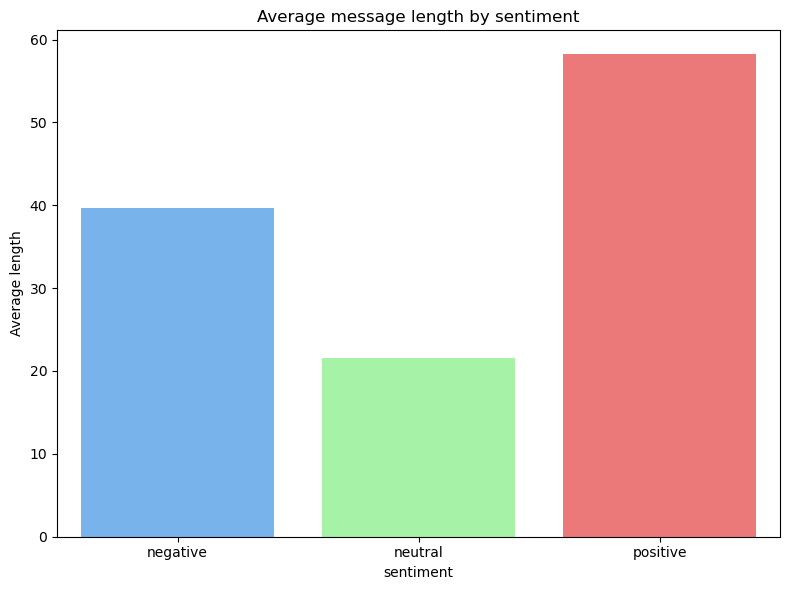

In [446]:
df_copy = df.copy()

def load_tone_dict_ua(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=',')
    return dict(zip(tone_dict['word'], tone_dict['sentiment']))

def load_tone_dict_ru(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=';')
    return dict(zip(tone_dict['term'], tone_dict['value']))

def get_sentiment(message, tone_dict):
    words = message.split()
    sentiment_score = 0
    for word in words:
        word = word.lower()
        if word in tone_dict:
            sentiment_score += tone_dict[word]
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

tone_dict_ua = load_tone_dict_ua('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-uk-full.csv')

tone_dict_ru = load_tone_dict_ru('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-ru.csv')

df_copy = df_copy[df_copy['message'].notna() & (df_copy['message'].str.strip() != '')]

df_copy['sentiment_ua'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ua))

df_copy['sentiment_ru'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ru))

df_copy['sentiment'] = df_copy['sentiment_ua'].combine_first(df_copy['sentiment_ru'])

df_copy['hour'] = pd.to_datetime(df_copy['date']).dt.hour

df_copy['message_length'] = df_copy['message'].str.len()

sentiment_stats = df_copy.groupby('sentiment').agg(
    average_length=('message_length', 'mean')
).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='average_length', data=sentiment_stats, palette=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Average message length by sentiment')
plt.ylabel('Average length')
plt.tight_layout()
plt.show()

#### 25. Show the sentiment distribution by hour of the day

<Figure size 1200x800 with 0 Axes>

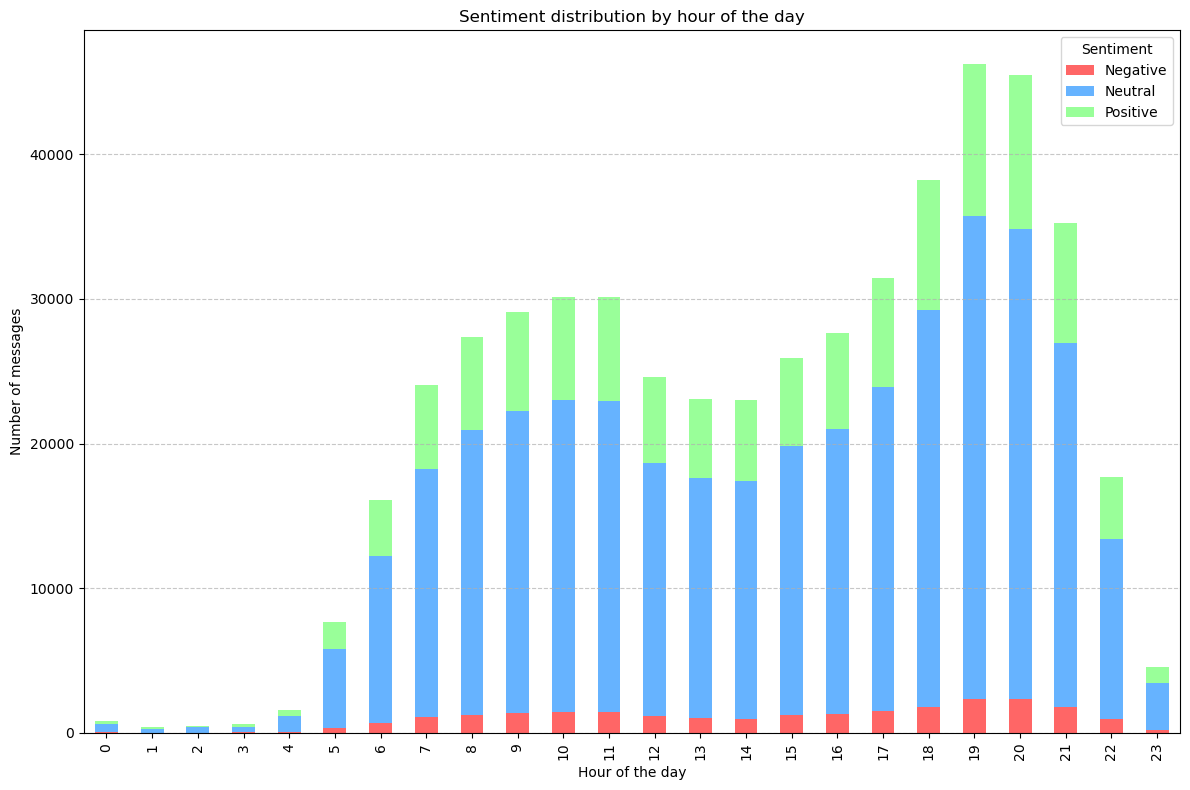

In [39]:
df_copy = df.copy()

df_copy = df_copy[df_copy['message'].notna() & (df_copy['message'].str.strip() != '')]

def load_tone_dict_ua(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=',')
    return dict(zip(tone_dict['word'], tone_dict['sentiment']))

def load_tone_dict_ru(file_path):
    tone_dict = pd.read_csv(file_path, delimiter=';')
    return dict(zip(tone_dict['term'], tone_dict['value']))

def get_sentiment(message, tone_dict):
    words = message.split()
    sentiment_score = 0
    for word in words:
        word = word.lower()
        if word in tone_dict:
            sentiment_score += tone_dict[word]
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

tone_dict_ua = load_tone_dict_ua('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-uk-full.csv')

tone_dict_ru = load_tone_dict_ru('/Users/nikita/tone-dict-ukrainian/dicts/tone-dict-ru.csv')

df_copy['sentiment_ua'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ua))

df_copy['sentiment_ru'] = df_copy['message'].apply(lambda x: get_sentiment(x, tone_dict_ru))

df_copy['sentiment'] = df_copy['sentiment_ua'].combine_first(df_copy['sentiment_ru'])

df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['hour'] = df_copy['date'].dt.hour

sentiment_hour_group = df_copy.groupby(['hour', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))

sentiment_hour_group.plot(kind='bar', stacked=True, color=['#ff6666', '#66b3ff', '#99ff99'], figsize=(12, 8))

plt.title('Sentiment distribution by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of messages')
plt.xticks(range(24))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment')
plt.tight_layout()
plt.show()